In [15]:
from pylab import *
#import random
p=0.444
p_1 = p # Wahrscheinlichkeit der Übertragung an Nachbarn
p_2 = p # Wahrscheinlichkeit krank zu bleiben
t_N = 100000
i_M = 100
A = np.zeros((t_N, i_M)) #erhalte nxm-Matrix mit 0-en
print (A)

[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]


In [16]:
A[0][50] = 1 #eine beliebige Zahl der 1.Zeile wird 1 -> r0 = 0.01???

In [17]:
for i in range(t_N-1):
    for j in range(i_M):
        if A[i,j] == 1:
            if np.random.rand() < p_1: # Übertragung an Nachbarn
                A[i+1][(j+1)%i_M] = 1
            if np.random.rand() < p_2: # krank bleiben
                A[i+1][j] = 1
            if np.random.rand() < p_1: # Übertragung an Nachbarn
                A[i+1][(j-1)%i_M] = 1
                
            

In [18]:
%matplotlib inline

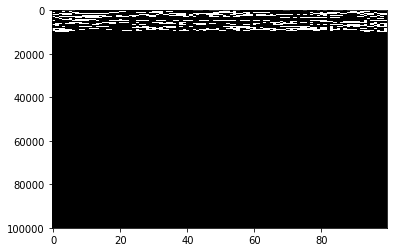

In [19]:
imshow(A,interpolation='none',aspect="auto", cmap='gray')
show()

In [20]:
A.shape

(100000, 100)

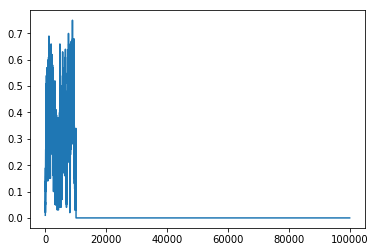

In [21]:
plot(sum(A,axis=1)/i_M)
show()

In [22]:
Tohm = False
for y in range(t_N-1): #definiere Tohm als erste Nullzeile, also als Zeitpunkt, wenn die Krankheit verschwindet
    anzahl_einsen = 0
    for x in range(i_M):
        if A[y][x] == 1:
            anzahl_einsen = anzahl_einsen + 1
        if x == (i_M-1):
            if anzahl_einsen == 0:
                if Tohm == False:
                    Tohm = y 
                                    

    if (y == t_N - 2 and Tohm == False):
        Tohm = t_N + 1
            
print(Tohm)

10104


In [67]:
r = sum(A, axis = 1) #r definiert als Anzahl der Einsen pro Zeile, bzw. Anzahl der Erkrankten pro Zeitschritt
print(r)

[ 1.  2.  1. ...,  0.  0.  0.]


Text(0,0.5,'r')

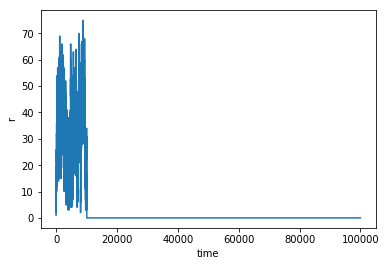

In [68]:
plot(r)#das ist das Diagamm t-r
xlabel('time')
ylabel('r')

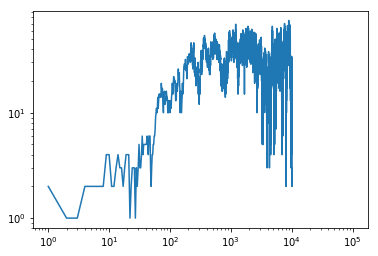

In [69]:
loglog(r)#beim doppelt logarythmisch plotten kommt schwachsinn raus... vielleicht falsches r???

Hier müsste noch rein was wir für p_cr experimentell für einen Wert ermittelt haben. 
Wenn p_cr < p, dann geht r gegen einen Wert =! 0 der saturiert.
Wenn p_cr > p, dann geht r gegen 0.
Bei p_cr soll gelten r(t) ~ t^-delta. 

In [86]:
k = list(range(1,100001))
m = sum(A[:][:Tohm])
t = np.array(k) #t als Zeit array definiert
#r = t^-d --> log(r) = -d * log(t) --> -(log(r)/log(t)) = d

d = -(log(m)/log(t))
print(d)

[        -inf -18.30605279 -11.54983337 ...,  -1.10213611  -1.10213516
  -1.1021342 ]


C:\Users\Lea\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in true_divide
  


In [90]:
# soll gelten r=t^-delta --> dann loglog von t^-delta und
plot(t^(-d))

TypeError: ufunc 'bitwise_xor' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''